In [1]:
# Importing Neccessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import string
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [32]:
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras import layers , activations , models , preprocessing, utils
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
from sklearn import metrics
import os
import yaml
import nltk
import re
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [3]:
df=pd.read_csv('D:/ANLAB/AI/Case Study/final case study/1. Toxic Comment Classification (1)/1. Toxic Comment Classification/train.csv') 
# Reading train dataset.

In [4]:
test=pd.read_csv('D:/ANLAB/AI/Case Study/final case study/1. Toxic Comment Classification (1)/1. Toxic Comment Classification/test.csv',encoding="ISO-8859-1") 
# Reading train dataset.

In [5]:
df
# Loading dataset.

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
df.info()
# Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.isnull().sum()                       
# There are no null values.

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df['toxic'].value_counts()  
# Counts of toxic and non toxic sentences.

0    144277
1     15294
Name: toxic, dtype: int64

In [9]:
df['severe_toxic'].value_counts()  
# Counts of severe_toxic and non severe_toxic sentences.

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [10]:
df['obscene'].value_counts()       
# Counts of obscene and non obscene sentences.

0    151122
1      8449
Name: obscene, dtype: int64

In [11]:
df['threat'].value_counts()            
# Counts of threat and non threatening sentences.

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df['insult'].value_counts()              
# Counts of insult and non insulting sentences.

0    151694
1      7877
Name: insult, dtype: int64

In [13]:
df['identity_hate'].value_counts()          
# Counts of toxic and non identity_hate sentences.

0    158166
1      1405
Name: identity_hate, dtype: int64

### Data Visualization

In [14]:
sentencetype_graph=df.iloc[:,2:].sum()              
# Using only numeric columns.

In [15]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

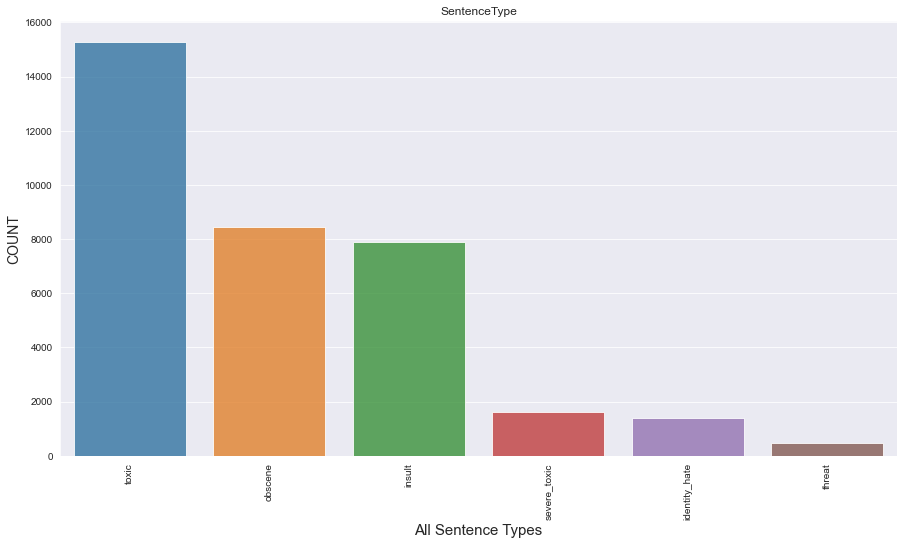

In [16]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

In [17]:
# There are a many toxic sentences followed by obscene sentences and very few threatening sentences as seen above. 

# Text Pre-processing

In [18]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [19]:
import re
import string

In [20]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
#     print(review)
    corpus.append(review)

In [21]:
def processQues(chat):
    chat = chat.lower()
    chat = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',chat)
    chat = re.sub('@[^\s]+','',chat)
    chat = re.sub('[\s]+', ' ', chat)
    chat = re.sub('\[\d+\]+', ' ', chat)
    chat = re.sub(r'#([^\s]+)', r'\1', chat)
    chat = re.sub(r'[\!:\?\-\'\"\\/]', r'', chat)
    chat = chat.strip('\'"')
    chat=re.sub('\w*\d\w*', ' ', chat)
    chat=re.sub(r'[^\x00-\x7f]',r' ', chat)
    chat=re.sub("\n", " ", chat)
    chat=re.sub('[%s]' % re.escape(string.punctuation), ' ', chat.lower())
    return chat

In [22]:
df["comment_text"]=df["comment_text"].apply(processQues)
test["comment_text"]=test["comment_text"].apply(processQues)

In [23]:
# alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# remove_n = lambda x: re.sub("\n", " ", x)
# remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# # Removing special characters

In [24]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pros...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


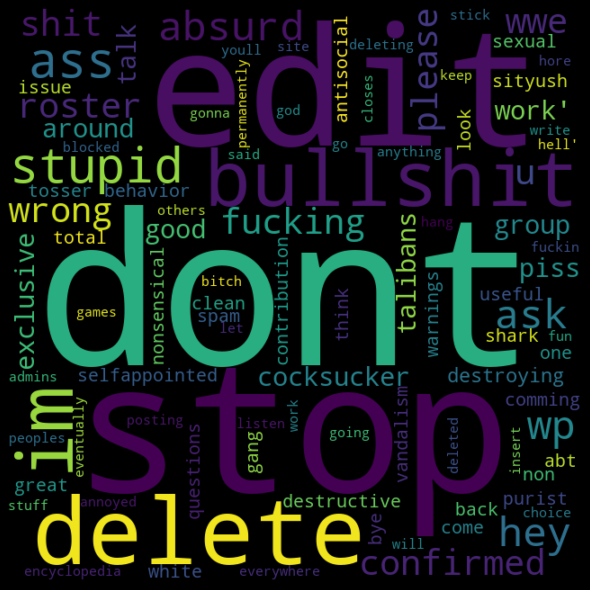

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_text = df['comment_text'].loc[df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comment_text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
list_sentences_train = df["comment_text"].values
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df[list_classes].values
list_sentences_test = test["comment_text"].values

In [27]:
EMBEDDING_FILE='D:/ANLAB/AI/glove.6B/glove.6B.100d.txt'

In [28]:
list_sentences_train[0]

'explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms  just closure on some gas after i voted at new york dolls fac  and please dont remove the template from the talk page since im retired now        '

In [ ]:
#tokenizer.texts_to_sequences(list_sentences_train[0]

In [29]:
embed_size = 100 # how big is each word vector
max_features = 40000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use

In [33]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))

list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [34]:
X_train[-10:]

array([[   24,    66,  3002,    15,   140,     7,    54,  1852,  2123,
            8,   128,  4239,    31,    34,    25,   127,   239,  1166,
           21,   423,  7689,   191,   288,    26,    47,    42,     5,
          367,  1267,    12,   140,   938,    89,    89,    13,     8,
          201, 22484,    27,    36,    28,   353,   670,    44,    16,
          565,    15,    28,   161,    27,    22,     7,   669,     2,
          328,    88,     9,     8,    70,     7,   157,    73, 33772,
         1900,     3,    13,   423,   191,    11,     8,    50,     5,
         4844,   266,     2,     9,  1334,    24,   345,  3083,    17,
          343,   492,    22,    74,    32,    14,    10,   158,   104,
            2,   490,    11,    25,    64,  1166,  1731,   670,    15,
           11],
       [ 5488,    18,    29, 30997, 21120,    12,    13,   709,     3,
         3699, 15144,     5,   597,  3209,    17, 11380,     8,    66,
         2219,     2,  1068,    96,    11,  3916,     2,    6

In [35]:
word_index = tokenizer.word_index# indexing the each word

In [36]:
word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'my': 28,
 'an': 29,
 'from': 30,
 'by': 31,
 'do': 32,
 'at': 33,
 'me': 34,
 'about': 35,
 'so': 36,
 'wikipedia': 37,
 'can': 38,
 'what': 39,
 'there': 40,
 'talk': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'would': 46,
 'its': 47,
 'no': 48,
 'one': 49,
 'just': 50,
 'like': 51,
 'they': 52,
 'he': 53,
 'dont': 54,
 'which': 55,
 'any': 56,
 'been': 57,
 'should': 58,
 'more': 59,
 'we': 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'here': 64,
 'see': 65,
 'also': 66,
 'his': 67,
 'think': 68,
 'im': 69,
 'because': 70,
 'know': 71,
 'how': 72,
 'am': 73,
 'people': 74,
 'why': 75,
 'edit': 76,
 'articles': 77,
 'only': 78,
 'up': 79,
 'out': 80,
 'when': 81,
 

In [37]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [39]:
# Read the glove word vectors (space delimited strings) into a dictionary from word->vector.

In [40]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

In [41]:

# Read the glove word vectors (space delimited strings) into a dictionary from word->vector.
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE, encoding="utf8"))

In [42]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

(0.004451992, 0.4081574)

In [43]:
word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'my': 28,
 'an': 29,
 'from': 30,
 'by': 31,
 'do': 32,
 'at': 33,
 'me': 34,
 'about': 35,
 'so': 36,
 'wikipedia': 37,
 'can': 38,
 'what': 39,
 'there': 40,
 'talk': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'would': 46,
 'its': 47,
 'no': 48,
 'one': 49,
 'just': 50,
 'like': 51,
 'they': 52,
 'he': 53,
 'dont': 54,
 'which': 55,
 'any': 56,
 'been': 57,
 'should': 58,
 'more': 59,
 'we': 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'here': 64,
 'see': 65,
 'also': 66,
 'his': 67,
 'think': 68,
 'im': 69,
 'because': 70,
 'know': 71,
 'how': 72,
 'am': 73,
 'people': 74,
 'why': 75,
 'edit': 76,
 'articles': 77,
 'only': 78,
 'up': 79,
 'out': 80,
 'when': 81,
 

In [46]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [47]:
embedding_matrix[3],len(embedding_matrix[0])

(array([-0.1529    , -0.24279   ,  0.89837003,  0.16996001,  0.53516001,
         0.48784   , -0.58825999, -0.17982   , -1.35810006,  0.42541   ,
         0.15377   ,  0.24214999,  0.13474   ,  0.41192999,  0.67043   ,
        -0.56418002,  0.42985001, -0.012183  , -0.11677   ,  0.31781   ,
         0.054177  , -0.054273  ,  0.35516   , -0.30241001,  0.31434   ,
        -0.33846   ,  0.71714997, -0.26855001, -0.15837   , -0.47466999,
         0.051581  , -0.33252001,  0.15003   , -0.12989999, -0.54617   ,
        -0.37843001,  0.64261001,  0.82187003, -0.080006  ,  0.078479  ,
        -0.96976   , -0.57740998,  0.56490999, -0.39873001, -0.057099  ,
         0.19743   ,  0.065706  , -0.48091999, -0.20125   , -0.40834001,
         0.39456001, -0.02642   , -0.11838   ,  1.01199996, -0.53171003,
        -2.74740005, -0.042981  , -0.74848998,  1.75740004,  0.59085   ,
         0.04885   ,  0.78267002,  0.38497001,  0.42096999,  0.67882001,
         0.10337   ,  0.63279998, -0.026595  ,  0.5

In [48]:
embedding_matrix.shape

(40000, 100)

In [49]:
model=Sequential()
model.add(Embedding(max_features,embed_size, weights=[embedding_matrix]))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embed_size)))
model.add(Dropout(0.2))
model.add(Dense(6, activation="softmax"))
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [50]:
model.fit(X_train, y, batch_size=32, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
3990/3990 - 29264s - loss: 0.3650 - accuracy: 0.4237 - val_loss: 0.3228 - val_accuracy: 0.9925
Epoch 2/10
3990/3990 - 753s - loss: 0.3549 - accuracy: 0.4455 - val_loss: 0.3298 - val_accuracy: 0.9667
Epoch 3/10
3990/3990 - 7192s - loss: 0.3471 - accuracy: 0.4374 - val_loss: 0.3207 - val_accuracy: 0.9767
Epoch 4/10
3990/3990 - 703s - loss: 0.3439 - accuracy: 0.4466 - val_loss: 0.3284 - val_accuracy: 0.7996
Epoch 5/10
3990/3990 - 687s - loss: 0.3479 - accuracy: 0.4471 - val_loss: 0.3324 - val_accuracy: 0.9763
Epoch 6/10
3990/3990 - 1739s - loss: 0.3488 - accuracy: 0.4659 - val_loss: 0.3281 - val_accuracy: 0.9829
Epoch 7/10
3990/3990 - 691s - loss: 0.3509 - accuracy: 0.4754 - val_loss: 0.3303 - val_accuracy: 0.9754
Epoch 8/10
3990/3990 - 688s - loss: 0.3553 - accuracy: 0.4834 - val_loss: 0.3424 - val_accuracy: 0.9769
Epoch 9/10
3990/3990 - 688s - loss: 0.3597 - accuracy: 0.4873 - val_loss: 0.3469 - val_accuracy: 0.9775
Epoch 10/10
3990/3990 - 684s - loss: 0.3616 - accuracy: 0.49

In [52]:
model.save("model_final.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
#Load Model
from tensorflow.keras.models import load_model
model_loaded = load_model('model_final.h5')

In [54]:
print(model_loaded.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         4000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 4,162,006
Trainable params: 4,162,006
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
y_test = model_loaded.predict([X_test], batch_size=1024, verbose=1)
y_train_pred=model_loaded.predict([X_train], batch_size=1024, verbose=1)

156/156 [==============================] - 123s 789ms/step


In [56]:
y_test.shape

(63978, 6)

In [57]:
y_test[0]

array([0.26539835, 0.12372339, 0.20578612, 0.08129841, 0.19799924,
       0.12579453], dtype=float32)

In [58]:
y_test[-10:]

array([[0.25770527, 0.1291402 , 0.21043563, 0.08240777, 0.19672307,
        0.12358798],
       [0.2653727 , 0.12371142, 0.20576623, 0.08129055, 0.19807678,
        0.12578237],
       [0.26538977, 0.12371939, 0.20557861, 0.08133548, 0.19818628,
        0.12579046],
       [0.26524925, 0.12389562, 0.20587146, 0.08137185, 0.197888  ,
        0.12572387],
       [0.39774927, 0.00681032, 0.31862667, 0.00705659, 0.25888357,
        0.01087356],
       [0.26543075, 0.12373849, 0.20571077, 0.08134804, 0.19802341,
        0.12574847],
       [0.6098889 , 0.00590948, 0.24295266, 0.00486338, 0.13029744,
        0.00608814],
       [0.24773856, 0.10097905, 0.21097285, 0.08507441, 0.20831141,
        0.14692366],
       [0.6045449 , 0.00538584, 0.24141252, 0.00523289, 0.13694955,
        0.00647439],
       [0.2652946 , 0.12367503, 0.20590667, 0.08138576, 0.19811521,
        0.12562263]], dtype=float32)

In [86]:
# test['Toxic'] = ['not toxic' if x < .5 else 'toxic' for x in y_test]
# test[['comment_text', 'Toxic']].head(20)

In [66]:
y_test_df=pd.DataFrame(y_test, columns=list_classes)

In [67]:
list_classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [68]:
y_test_df=pd.DataFrame(y_test, columns=list_classes)

In [69]:
y_train_pred_df=pd.DataFrame(y_train_pred, columns=list_classes)

In [81]:
def threshold(val):
    if(val>=0.25):
        return 1  # toxic
    else:
        return 0 # Non Toxic

In [82]:
y_train_pred_df["toxic"]=y_train_pred_df["toxic"].apply(threshold)
y_train_pred_df["severe_toxic"]=y_train_pred_df["severe_toxic"].apply(threshold)
y_train_pred_df["obscene"]=y_train_pred_df["obscene"].apply(threshold)
y_train_pred_df["threat"]=y_train_pred_df["threat"].apply(threshold)
y_train_pred_df["insult"]=y_train_pred_df["insult"].apply(threshold)
y_train_pred_df["identity_hate"]=y_train_pred_df["identity_hate"].apply(threshold)

In [83]:
test[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]]=y_test_df


In [84]:
test["toxic"]=test["toxic"].apply(threshold)
test["severe_toxic"]=test["severe_toxic"].apply(threshold)
test["obscene"]=test["obscene"].apply(threshold)
test["threat"]=test["threat"].apply(threshold)
test["insult"]=test["insult"].apply(threshold)
test["identity_hate"]=test["identity_hate"].apply(threshold)

In [85]:
test.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,thank you for understanding i think very high...,1,0,0,0,0,0
1,000247e83dcc1211,dear god this site is horrible,1,0,1,0,0,0
2,0002f87b16116a7f,somebody will invariably try to add religion ...,1,0,0,0,0,0
3,0003e1cccfd5a40a,it says it right there that it is a type the...,1,0,0,0,0,0
4,00059ace3e3e9a53,before adding a new product to the list m...,1,0,0,0,0,0
5,000663aff0fffc80,this other one from,1,0,0,0,0,0
6,000689dd34e20979,reason for banning throwing this article...,1,0,0,0,0,0
7,000844b52dee5f3f,blocked from editing wikipedia,1,0,0,0,0,0
8,00091c35fa9d0465,arabs are committing genocide in iraq but ...,1,0,0,0,0,0
9,000968ce11f5ee34,please stop if you continue to vandalize wiki...,1,0,0,0,0,0
